# Results From Reverse Conway's Game of Life Simulations


By: Ricardo Pina

## I used dev-intel16 for all computations

## Directions for your instructor

Include detailed instructions for compiling and reproducing the results you have in this report.  Automate as much of the steps as possible to help speed up grading.


A good idea is to show your specific commands here in the jupyter notebook.  Use the exclamation point (!) to run bash commands inside of jupyter. For example:

Serial is mostly the same as a just cloned repository of reverse_conway. pp_benchmark, mpi_basic, and mpi_best all run using the same commands, and have had their source files moved to /source, parallel_out is a place to store old compilations but is usually deleted by the scripts. I chose sbatch to do all computations even the serial as I wanted the .out files so I could look at the print of the plates afterwards.

#Serial
    sbatch timecheck.sb
#pp_benchmark
    bash move_out.sh  // removes and moves out files
    bash make.sh      // runs makefile in source directory
    sbatch job_array.sb
#mpi_basic
    bash move_out.sh
    bash make.sh
    sbatch mpi_job.sb
#mpi_best
    bash move_out.sh
    bash make.sh
    sbatch mpi_job.sb

#Serial
I compiled the serial code on the intel16 dev node using the following commands:

sbatch timecheck.sb
    
    #!/bin/bash --login
    #SBATCH --nodes=1
    #SBATCH --mem-per-cpu=10000
    #SBATCH --cpus-per-task=1
    #SBATCH --time=04:00:00

    make clean
    make

After running the serial code on the test data `make test` and the cmse2.txt file, I noticed that for the data.txt file, even though it was a small plate size it did not find a perfect solution, and that is probably because there was no possible solution, I think that there could have been a possible solution if the plate had a surrounding boundary of zeros so that an appropriate solution could be found however that may defeat the entire point of the program. With cmse2.txt after compilation the best case scenario that I found was with a fitness of 274, that means that on iteration `./gol < serial_best.txt` there are only 274 differences between serial_best.txt and cmse2.txt. Out of 2500 points one would think that this is great, this amounts to 89% similarity, however to the human observer this is not even an appealing solution due to the fact that (as we can see below) we can't figure out any words or shapes, this is due to the fact that the plate is mostly 0's and answers would gravitate to favoring solutions with basically blank plates since there are so few 1's. I think this points to how the muate rate was coded, since answers that are really good are mutated at a lower rate, we can see that here on lines 71-82.

    void mutate(char * plate, char * best_plate, int n, int rate) {
      for(int i = 1; i <= n; i++)
        for(int j = 0; j < n; j++) {
            int index = i * (n+2) +j + 1;    
            if ((rand() %  100) < rate) {
                plate[index] =  (rand() % 2) > 0;
        } else {
                plate[index] =  best_plate[index];
              }
          }
      return; 
    }

The later solutions for the project bypass the general algorithm with bruteforce as we see later a minor change in random numbers gives us slighty better answers with more appealing solutions.
 
Average time was 14 minutes and 33 seconds.


In [6]:
print(
"""
50 1
01110111111111111111111111111111111111111111111111
11111111111111111111111111111111011111111111011111
11101010111111110101111111111011111110110111111011
11011011110111011111011110010110011111111011111111
11110111010111110101111111110001101111111101101111
11111111111011111010010111011111111111101101101011
11111111111111111111111101101111101111110110111011
10101111011111011111111110011111111101111110111110
11011001111110111110111111101111110111111101111111
11101111111111110111001111111101110011111111111111
11111111111111011111110101110111011111101111011111
11111100000110111111111111011111111111101111111111
01011111111111111111011111111110111111111011111101
11111111111010111111111111101010110011011111111111
11111101111110111111111111110111110111111111110111
11011111111111111110110101111010110100011111010111
11111011111011101111111111011111101111111010111111
10100110111011101011110111011100111111110111101011
11111011000010111111011011100111110100111111011111
11101110011011111110011111011111111100111111011111
11111111011011111101011111111111110111101111001101
11111111100111111101111011110111110110101111111111
01011111010111011111111111111111110111111101111111
11111111010111010101101111011001111110100011111111
11111111001111111111101111101111101111000111011111
11111011100111111111110111110111111111011111110111
11111011101111011111100111011111111110100111111110
11010111110001110111111111111111111110101101011111
11111011111111111110011111111111001111111011100111
11111111110101111011101011100101101011111101111110
11111100011111111110111010111101111111111111011111
10111011111111111111100111111100111111111001111111
11111110101110111010111110111111111011001111111111
11101111111111111101111111111111111111101011110101
11110111100111111111110111111111111111111011111111
11111011111111111101110101101111111111111111111011
11110111011110011111101101011111111111111111101101
01101111010111111101110011111101101110011111111111
11011111101111111111011101111111111111110101101111
11111111111101111101111111111110101111111001001111
10111111110111111101111111111111111110101111111111
11110110110110101110010111010101111111111111111011
11101111101111101110101001110011110111111011111111
11101111101010111101001111011111111111111111111111
11111111110110101111111001111111110111111111010011
11101111111101111111011111111111111111101111111111
11110011110110111101101100010010111111110111111110
11000101101011111111111111111111110111111111101111
11011111111111111111111111110111110111111111111111
11111110110111111111111111111111111111111111111110

Result Fitness=274 over 1000 iterations:

real	14m36.438s
user	14m36.021s
sys	0m0.080s
"""
)


50 1
01110111111111111111111111111111111111111111111111
11111111111111111111111111111111011111111111011111
11101010111111110101111111111011111110110111111011
11011011110111011111011110010110011111111011111111
11110111010111110101111111110001101111111101101111
11111111111011111010010111011111111111101101101011
11111111111111111111111101101111101111110110111011
10101111011111011111111110011111111101111110111110
11011001111110111110111111101111110111111101111111
11101111111111110111001111111101110011111111111111
11111111111111011111110101110111011111101111011111
11111100000110111111111111011111111111101111111111
01011111111111111111011111111110111111111011111101
11111111111010111111111111101010110011011111111111
11111101111110111111111111110111110111111111110111
11011111111111111110110101111010110100011111010111
11111011111011101111111111011111101111111010111111
10100110111011101011110111011100111111110111101011
11111011000010111111011011100111110100111111011111
1110111001101111111001111

Below is the unappealing solution

In [7]:
print(
"""
10000000000000000000000000000000000000000000000001
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000100000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000100000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000001000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000011000000000000000000000000000000000000000
00000000000000000001000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000010000000000000000000000000000000000000000
00000000010000000000000000000000000000000000000000
00000000010000000000000000000000000000010000000000
00000000000000000000000000000000000000010000000000
00000000001000000000000000000000000000100000000000
00000000000000000000000000000000000000000000000000
00000000000100000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000001000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000100000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000100000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00010000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
10000000000000000000000000000000000000000000000001
"""
)



10000000000000000000000000000000000000000000000001
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000100000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000100000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000001000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
000000000110000000000000000000

#pp_benchmark

I compiled the job array code on the intel16 dev node using the following commands:

bash move_out.sh 
    #!/bin/bash --login

    mkdir -p parallel_out
    mv *.out parallel_out
bash make.sh      
    #!/bin/bash --login

    rm *.out
    make clean -C source
    make -C source
sbatch job_array.sb
    #!/bin/bash --login

    #SBATCH --time=00:60:00
    #SBATCH --mem=2G
    #SBATCH -N 1
    #SBATCH -c 1
    #SBATCH --array 1-50

    time srun ./source/revGOL ./source/cmse2.txt $SLURM_ARRAY_TASK_ID

I moved all code to /source for organization purposes, I created the bash file to move .out files and the make bash file is made for ease of use so compilation by "cd" into source is not necessary. Below is the best solution I found and its iteration one step forward. I used the print function for python as I felt that was the best way to display the text file in this notebook.


`cat *.out | grep Result` was the command I used to find the relevant results. 

When we iterate the code forward it is interesting to note that the plate looks very similar to the solution, this may be an indication of how to gear our code towards solving these problems, I think that is why Professor Colbrys code has the initial plate setup from the target plate. 

    void mutate(char * plate, char * best_plate, int n, int rate) {
      for(int i = 1; i <= n; i++)
        for(int j = 0; j < n; j++) {
            int index = i * (n+2) +j + 1;
            if ((rand() %  100) < rate) {
                plate[index] =  (rand() % 2) > 0;
              } else {
                plate[index] =  best_plate[index];
              }
          }
      return;
    }

In [2]:
print(
"""
50 1
00000000000000000101000010000000000000000000000000
10000000000000000000000000000010000000000000000000
00000000000000000000001111110000000000000000000000
00000000000000010000110000001100000000000000000000
00000000000000000101000000010010001000001100000011
00000000100000000010000001000001010000000000000000
00000000100000000100000000000000100001010000000000
00000000000100001000000010000000010000000000000001
00000000010000001010000000000000000000000000000000
00010000000000010001010000000000001000000000000000
00000000000000010000000010010000001000000000000000
00000000000010011111111000011111111010000000000000
00000000000000101000000111100000000000000000000001
00010000000000100000001000100000000000000010100000
00000000000000100100001000000000000100000000000000
10000000000011000000110000010000001111000000000000
00000000000110010000010010001010001000100000010000
00000100001000000000100000101000001000100100000000
00000000001000010000100000000100001000101000000100
01000000001000001001000100000100010000010000000000
10000000010000000100000000000100100001010000000001
00000000010000000011000010000001000000010000000000
00000000011000000001000000010010000001010000000000
00000000010100000001110001000100000000010000000000
00000001010000000000000111111010001000011100000100
00100000010000000001000100001000000001010000100000
00001010001000000000100000101000000000100000000000
00000000000100000100100000001100000010101000000100
00000000000100000000010000001000000000100000000100
00000100000010000000001010010000000001000000000000
00000000000001000001001000100010000010000000001000
00000000000000101000000111100000001000000000000000
00000000000000011111111000011111110100000000000000
00000000100000000000000000100000000000000000000000
00101000000000000010000000000000000000000000000000
00000111100000100000000001000011111100000110111000
00011000010000100000000000000100000000001001010100
00100010000000110000001100100001000000010000000000
01100001000000101000011010001001000000010000000000
00100100000000101000010010001000000001010001000000
01000000000000100100010010100100100010010000000000
01010000000000100100100010000011110000011111111000
01000000010000100010100010000000001000010100000000
01000000000010100001000010000000000100010010000000
00100000000000100000000011010000000100010000000000
00100000000000100000000010000000000110010000000000
00011100101000100000000011001000000100010000000000
00000111110010100000000010000111111000001111111000
01000000000000000000010000000000000000000010000000
00000000000000000000000000000000000000000000000000

Result Fitness=254 over 1000 iterations:

real	14m33.450s
user	0m0.038s
sys	0m0.040s
"""
)


50 1
00000000000000000101000010000000000000000000000000
10000000000000000000000000000010000000000000000000
00000000000000000000001111110000000000000000000000
00000000000000010000110000001100000000000000000000
00000000000000000101000000010010001000001100000011
00000000100000000010000001000001010000000000000000
00000000100000000100000000000000100001010000000000
00000000000100001000000010000000010000000000000001
00000000010000001010000000000000000000000000000000
00010000000000010001010000000000001000000000000000
00000000000000010000000010010000001000000000000000
00000000000010011111111000011111111010000000000000
00000000000000101000000111100000000000000000000001
00010000000000100000001000100000000000000010100000
00000000000000100100001000000000000100000000000000
10000000000011000000110000010000001111000000000000
00000000000110010000010010001010001000100000010000
00000100001000000000100000101000001000100100000000
00000000001000010000100000000100001000101000000100
0100000000100000100100010

In [ ]:
print(
"""
00000000000000000000000000000000000000000000000000
00000000000000000000000000100000000000000000000000
00000000000000000000011111111100000000000000000000
00000000000000000000111111001100000000000000000000
00000000000000000011100000001110000000000000000000
00000000000000000110000000000001110000001000000000
00000000000000000100000000000000110000000000000000
00000000000000001000000000000000000000000000000000
00000000000000011100000000000000000000000000000000
00000000000000011000000000000000000000000000000000
00000000000000110100001000010111101000000000000000
00000000000000100111111000011111111100000000000000
00000000000001101011100111101111110000000000000000
00000000000001100000001010100000000000000000000000
00000000000000100000001000000000001100000000000000
00000000000111100000111000000000001011000000000000
00000000000111000000010000001100011010100000000000
00000000001000000000110000011000011101100000000000
00000000011100000001100000001100011000101000000000
00000000011000001000000000001110010000011000000000
00000000011000000101000000000010100000011000000000
00000000110000000011000000000011000000011000000000
00000000110000000000000000000010000000011000000000
00000000010000000001100001000110000000010000000000
00000000010000000001001101111000000000010000000000
00000000111000000000000100001000000000010000000000
00000000001000000001100000001000000000100000000000
00000000001100000000110000001100000000100000000000
00000000000110000000010000011100000000110000000000
00000000000010000000011100010000000001000000000000
00000000000001000000001000110000000000000000000000
00000000000000101000000111101000111100000000000000
00000000000000011111111110011111111000000000000000
00000000000000001000110000011111100000000000000000
00000110100000000000000000000001111000000000010000
00000111100000000000000000000011111000000111111000
00011000100001100000000000000000011000001111010000
01100000000001100000011100000010000000011000000000
01110010000001101000010011010000000000011000000000
00100000000001101100110010011100000000011000000000
01000000000001101100110110000110110000010100010000
11000000000001110111110110000011110000110111110000
11000000000000110010100111000001111000110000110000
01100000000000110001000110000000001100110000000000
01100000000000110000000111000000001100111000000000
00101000000001110000000100100000001110111000000000
00011100100000110000000111000111110110010111110000
00000111110001000000000011000111111000001111110000
00000011100000000000000000000011110000000010110000
00000000000000000000000000000000000000000000000000
"""
)

## MPI_Basic

I compiled the MPI code on the intel16 dev node using the following commands:

`bash make.sh`, `bash move_out.sh` and `sbatch mpi_job.sb`

    #!/bin/bash --login

    #SBATCH --time=00:45:00
    #SBATCH --mem=100G
    #SBATCH -N 50
    #SBATCH -c 1

    time srun ./source/revGOL ./source/cmse2.txt


I decided to get rid of alot of the print statements when it came to doing the mpi job, as they were not being helpful and were making the results hard to read I had to remove most of them, even the ones that were synchronized by the end of the project with the mpi api code had weird effects on the .out files. 
When deciding how to write the mpi code I decide that it was necessary to communicate the best plates, this was hard to do because the same pointer kept updating the data so by then end of the programs run I had 50 plates that looked exactly the same, to get around this issue I familiarized myself with how the code was initializing plates in main, I used cudaMallocManaged in the last class so using calloc was new to me however I got the hang of it. This is how I wrote it: 

    char *bplate = (char *) calloc((n+2)*(n+2),sizeof(char));
    MPI_Recv(bplate, ((n+2)*(n+2)), MPI_CHAR, i, i, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
       
To hold the plates and appropriate messages thread 0 was in charge of this code:

    buffer_messages[i] = buffer_message;
    buffer_plates[i] = bplate;

This mpi job is basically the same as the array job, so there were no improvements and we see an example of the iteration, it is very similar to the solution found in the job array.

In [ ]:
print(
    """
Thread ID=12, Result Fitness=256 over 1000 iterations:
50 1
00000000100100000000000000010000010000000010000010
10000000000001000000000100000000000101000000000000
00000000100000000000001110110000000000000000000000
00000000000000000000010010011100000000000000000000
00000000010100000001000000000010000000000000000000
00000000000000000010000000000001000000000000000000
00000000000100000100000000000000100000000001000000
00000000000000000000000000001000010000000000000000
00000000000000001000000000000000011000000000000000
00000000100001010000010000000000001010100000000000
00000100000000010000100000000000001000000000001000
01000000000000011111111100011111111000000000001000
00000000000000100000000110100000001000000000000000
01000000000000100010001000111000001100000100010000
10000000000000100000001000010000000100000000000000
00000000000011100000010001010000001111000000000000
00000000000100010000010000001000001000100000000000
00000000001010010000000000011000001000100000000000
00001000011000010000100000000110001000000000000000
00100000001000001001000000010100010000010000000010
00000000010000000101000000000100100010010000000000
00001000010000000011010000000101000000010000000000
10000000000000000001000100000010000000010100000000
00000000011010000101010000000100000001011000000000
00001000010000000001001111111000010001010000000100
00000000001010000001000001000000000000010000000000
00000000001000000000100000100001001000100000000000
00000000000100000010100000001000000000101000010000
00000000000100000000010000011000000000100000000000
00000000000110000000001000000000000001000000010010
00000000000001000000011000100010000010000000001000
01000000000000100000000111100000001100000000000000
00000010000000011111111000011111110000000000000000
00000000000000000000000100000000000000000000000000
00000000000000000110000000000000000000000000000000
10000110000000100000000010000011111000000111111000
00011000010000100000000100010100001000001000000000
00100000000000110000001100000100000000010000000000
00100000000000101000010010001000000000010000000000
00100000000010101000010010001000000000010000000000
01000000010100110100011010000100000000010000000000
01000001000000100100100010000011110001011111111000
01000000000000100010100010000000001000010100000000
01000000000000100001000010000000100010010000000000
00100000100000100000000010100000000100011000000000
00100000110001100000001010000001000100010000000000
00011000001000000000000010001000000110010000000000
00000111110000100000000010000111111010001101111000
01000000100000000000000000000000000000000000001000
00000000000000000000000000000000000000000000000000

real	19m5.909s
user	0m0.048s
sys	0m0.055s
    """
)


Thread ID=12, Result Fitness=256 over 1000 iterations:
50 1
00000000100100000000000000010000010000000010000010
10000000000001000000000100000000000101000000000000
00000000100000000000001110110000000000000000000000
00000000000000000000010010011100000000000000000000
00000000010100000001000000000010000000000000000000
00000000000000000010000000000001000000000000000000
00000000000100000100000000000000100000000001000000
00000000000000000000000000001000010000000000000000
00000000000000001000000000000000011000000000000000
00000000100001010000010000000000001010100000000000
00000100000000010000100000000000001000000000001000
01000000000000011111111100011111111000000000001000
00000000000000100000000110100000001000000000000000
01000000000000100010001000111000001100000100010000
10000000000000100000001000010000000100000000000000
00000000000011100000010001010000001111000000000000
00000000000100010000010000001000001000100000000000
00000000001010010000000000011000001000100000000000
000010000110000100001

In [3]:
print(
"""
00000000000000000000000000000000000000000000000000
00000000000000000000001110110000000000000000000000
00000000000000000000001011110000000000000000000000
00000000000000000000001011111100000000000000000000
00000000000000000000000000001110000000000000000000
00000000001000000010000000000001000000000000000000
00000000000000000000000000000000100000000000000000
00000000000000000000000000000000111000000000000000
00000000000000000000000000000000011100000000000000
00000000000000111000000000000000001000000000000000
00000000000000010110000000001111101000000000000000
00000000000000111111111110011111101100000000000000
00000000000000101000100011100011100000000000000000
00000000000001110000001001101000001100000000000000
00000000000000110000011000000000000000000000000000
00000000000011110000011000111000001011000000000000
00000000000100010000000000101000011010100000000000
00000000011000111000000000011000011100000000000000
00000000011000011000000000010110011000000000000000
00000000001000001011100000000100010000000000000000
00000000011000000101000000000100100000111000000000
00000000000000000001000000000101000000110000000000
00000000011000000001001000000110000000010000000000
00000000011000000001000001111100000000010000000000
00000000010000000001001111111000000000010000000000
00000000011100000001100100000000000000010000000000
00000000001000000000100000000000000000100000000000
00000000001100000001110000001000000001100000000000
00000000001100000000010000011000000001110000000000
00000000000110000000001000010000000001000000000000
00000000000011000000011010100000000110000000000000
00000000000000111111000111101000111100000000000000
00000000000000011111111001111111111000000000000000
00000000000000000000111000001111100000000000000000
00000000000000000000000000000001110000000011110000
00001100000000000000000000000011111000000111110000
00011100000001100000001110001101101000001111110000
00100000000001100000001110000100000000011000000000
01110000000000101000010010001100000000111000000000
01100000000000101100110011001100000000111000000000
01100000000000100100111011000111100000010111110000
11100000000001101111100011000011110000010111110000
11100000000001110010100111000000000000010101110000
01100000000001110001000110000000000100110000000000
01100000110000110000000010000000000110111000000000
00100000110001100000000010000000001100110000000000
00011110001001100000000011000100010010010000110000
00001111110000000000000000000111111010001000111000
00000010110000000000000000000011110000000000101000
00000000000000000000000000000000000000000000000000
"""
)


00000000000000000000000000000000000000000000000000
00000000000000000000001110110000000000000000000000
00000000000000000000001011110000000000000000000000
00000000000000000000001011111100000000000000000000
00000000000000000000000000001110000000000000000000
00000000001000000010000000000001000000000000000000
00000000000000000000000000000000100000000000000000
00000000000000000000000000000000111000000000000000
00000000000000000000000000000000011100000000000000
00000000000000111000000000000000001000000000000000
00000000000000010110000000001111101000000000000000
00000000000000111111111110011111101100000000000000
00000000000000101000100011100011100000000000000000
00000000000001110000001001101000001100000000000000
00000000000000110000011000000000000000000000000000
00000000000011110000011000111000001011000000000000
00000000000100010000000000101000011010100000000000
00000000011000111000000000011000011100000000000000
00000000011000011000000000010110011000000000000000
000000000010000010111000000001

## MPI_Best

I compiled the MPI code on the intel16 dev node using the following commands:

`bash make.sh`, `bash move_out.sh` and `sbatch mpi_job.sb`

    #!/bin/bash --login

    #SBATCH --time=00:45:00
    #SBATCH --mem=100G
    #SBATCH -N 50
    #SBATCH -c 1

    time srun ./source/revGOL ./source/cmse2.txt

For the mpi job improvement I decided that after every iteration all jobs would talk with one another and decide which one had the best plate, that plate will overwrite the best plates for all. This solution makes it clear that the most important factor for finding good solutions would be based on the amount of jobs. I'm happy that we still found a good solution as it proves that the best jobs are found based on the random number generator, the best solution doesn't improve over the last one but we can consistently find a good solution.

the code is almost identical to the code that broadcasts the final jobs in MPI simple, thew only difference is this snip of code after the for loops:

    MPI_Bcast(best_plate, ((n+2)*(n+2)), MPI_CHAR, 0, MPI_COMM_WORLD);
    population[best] = best_plate;



In [ ]:
print(
"""
50 1
00000001000000000000000001000000000000000100000000
00000000000000010000001000000100000000100000000000
00001000000000010000001111110000000000000000000000
00000000000000000000110000001100000000000000000000
00000000000010000001000000000010000000000100000010
00000000001000000010000000010001000000000100000000
00000000000000000100000000010000100000000000000100
00000000000000001000000000000000010000000000000000
00001000000001001000000000000000010000000000000100
00000000000000010000000010000100001000000000000100
00000000000000010001000000010000001000000000010000
00000000000000011111111000011111111001000000000000
00000000000000100000000111100000001000000000000000
00000000000000100010001000100000001000000000000000
00000000000000000000001000010010000100000110100000
00000000000011100000010000010000001111000001000000
00000000000100010000010000001000011000100000000000
00000000001000010000100000001000001000100000001000
00000000001010010000100000001100001001100000000000
00000000001000001001000000000100010000010000100000
00000000010000000101000000000100100000010000100000
00000000011001000011010000000101000000010000000000
00000000010000000001000100001010000000000001000010
00000000010100100001111000000100000000010000100100
00001000010000000000001111111000000000011100000000
10000100001000001001000000001010011001010000100000
00000000001000000000100010101010000000100000000000
00000000000100100000100000001000000000000000000000
01000000010100000000010010001000000000100000000000
00000000000010000000001000010000000001001000000010
00000000000001001000001000100000100010000000000010
00000000000000100010010011100000001100000000000000
00000010000000010111111000011111110000000000000100
00001000000001000000000000000100000000000001000000
00000000000000000000000000000000000000000000000000
00000111000000100000100010000011111100000111111000
00011000010000100000000100000100000000001000000000
00100000000010110000001100000101000000010001000000
10100000010000101000010110101000000000010100010000
00100000000000101000010010101000000000010000001000
11000000000100100100110010000100000000010000000000
01000010000000111100100010000011110000011111111000
01000000000000100010100010000000001000010000000000
01000000000000100001000010000000000100010000000000
00100000000000110000000010000000001100000010000000
00100000100100100000000010000000000101010100001000
00011000001000100000000010001010000100001000000000
00010111110000100000000010010111111010001111111000
00001001000000000000010000000000000000000000001000
10000000001000000000000000000000100000000000000000
"""
)

In [ ]:
print(
"""
00000000000000000000000000000000000000000000000000
00000000000000000000001000000000000000000000000000
00000000000000000000001111110100000000000000000000
00000000000000000000111111111100000000000000000000
00000000000000000001100000001110000000000000000000
00000000000000000010000000000001000000000000000000
00000000000000000100000000000000100000000000000000
00000000000000001100000000000000110000000000000000
00000000000000011000000000000000011000000000000000
00000000000000111000000000000000011000000000001000
00000000000000110101010000010001101100000000000000
00000000000000111111111111011111101100000000000000
00000000000000101000100111101111101100000000000000
00000000000000000000001010110000001100000000000000
00000000000000100000011000110000000000000011000000
00000000000011100000011000011000010011000011000000
00000000000111010000110000011000010010100000000000
00000000001000111000110000011000001100110000000000
00000000011000011001100000001100011001110000000000
00000000011100001011100000000110010000010000000000
00000000010000000101000000001100100000111000000000
00000000111000000001000000001101000000000000000000
00000000110000000000000000001010000000000000000000
00000000110000000001110001100100000000010000000000
00000000010000000001001111111000000000010000000000
00000000011000000000000000001000000000010000000000
00000000001100000001100000001000000000100000000000
00000000000100000000110001001000000000000000000000
00000000001110000000010000011000000000000000000000
00000000000010000000011100010000000001000000000000
00000000000001000000011100110000000110000000000000
00000000000000111010000101101110001100000000000000
00000000000000100111111001111111111000000000000000
00000000000000000011110000000101100000000000000000
00000110000000000000000000000011111000000000010000
00001110000000000000000000000011111000000111110000
00011110000000100000001110000100011000001100010000
01100000000000100000000000001110000000010000000000
00110000000000101000010010001100000000110000000000
10100000000001101100010010001100000000110000000000
11100000000001100100110110000111100000110111101000
01100000000001101110100111000011110000110111110000
11100000000001101110100111000001111000110111110000
01100000000001100001000111000000000100000000000000
01100000000001110000000111000000001100101000000000
00100000000001100000000111000000000100001100000000
00111110001001110000000111001010110100010001101000
00010111110000000000000000001111111100001111111000
00001101010000000000000000000010000000000111101000
00000000000000000000000000000000000000000000000000
)

## Concluding Discussion

Describe what you learned during this process, what worked, what didn't work, where did you have trouble and what you learned

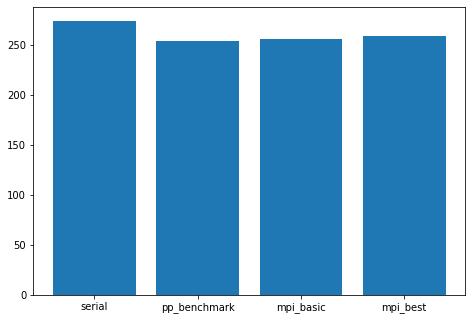

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
jobs = ['serial', 'pp_benchmark', 'mpi_basic', 'mpi_best']
fitness_values = [274,254,256,259]
ax.bar(jobs, fitness_values)
plt.show()

The pp_benchmark won but if we are being honest, it is identical to how mpi_basic works so the real question is whether or not mpi_best is an improvement and I would say that at the values it was tested at with only 50 nodes no, it did not perform better. 